<a href="https://colab.research.google.com/github/Chood16/DSCI222/blob/main/lectures/(13)_OOP_for_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Object Oriented Programming and PyTorch


## Introduction to OOP for PyTorch

This short, focused OOP primer covers the elements you will actually need when building PyTorch code.

Key concepts:
- **Class** — a blueprint for objects (`list`, `dict`, `DataFrame`)
- **Instance / Object** — a concrete realization of a class
- **Attributes** — data stored on the object (`.columns` `.shape`, `.__dict__`)
- **Methods** — functions attached to the object (`.append()`, `.pop()`, `.head()`)
- **Constructor** - special method in a class that runs automatically when you create a new object. (`__init()__`)

**Why OOP for PyTorch?**
- PyTorch uses objects for layers (e.g., `nn.Linear`), optimizers, datasets, and models.
- Building models as classes that inherit from `nn.Module` makes code reusable, testable, and composable.

### We've been working with classes and OOP this whole semester and may just not have realized it.

In [ ]:
import numpy as np

# Create a NumPy array
arr = np.array([[1, 2, 3],
                [4, 5, 6]])

print(arr)
print(type(arr))


`type(arr)` tells us that `arr` is an instance (object) of the class `numpy.ndarray`.

* `ndarray` is the class definition (a blueprint).

* `arr` is an object (created from that blueprint).


* `shape`, `ndim`, and `dtype` are attributes of the array object. They describe the state or metadata of the object.

In [ ]:
print(arr.shape)
print(arr.ndim)
print(arr.dtype)


We can see all attributes and methods available to arr with `dir(arr)` (directory)

In [ ]:
print(dir(arr))

Methods are functions defined inside the class that act on the object’s data.

In [ ]:
print(arr.sum())      # Sum of all elements
print(arr.mean())     # Average
print(arr.reshape(3, 2))


### Making Our Own Class

In [ ]:
# Let's make a dog class one step at a time
class Dog:
    def __init__(self): # <- self is a reference to the object being created.
      pass # <- our class doesn't do anything yet so we put this as a placeholder

In [ ]:
my_dog = Dog()
print(type(my_dog))

In [ ]:
# Now add some attributes to the dog
class Dog:
    species = "Canis familiaris" # <-- Attribute of all dogs
    def __init__(self, name, age,  breed=None):
        self.name = name # <-- Attribute of each dog
        self.age = age # <-- additional attributes
        self.breed = breed # <-- this attribute has a default specification, so assigning one is now optional

In [ ]:
my_dog = Dog("Buddy", 3)
print(my_dog)

In [ ]:
print(my_dog.name)

In [ ]:
print(my_dog.__dict__) # <-- show all attributes of the specific object
print(dir(my_dog)) # <-- show all attributes of an object in the class

In [ ]:
# Notice class attributes aren't included in __dict__
print(my_dog.species)

In [ ]:
# We can also add methods to our class.
class Dog:
    species = "Canis familiaris"

    def __init__(self, name, age, breed=None):
        self.name = name
        self.age = age
        self.breed = breed

    # Method 1: bark
    def bark(self):
        return f"{self.name} says Woof!"

    # Method 2: celebrate birthday
    def birthday(self):
        self.age += 1
        return f"Happy birthday, {self.name}! You are now {self.age} years old."

    # Method 3: describe the dog
    def describe(self):
        breed_info = f"Breed: {self.breed}" if self.breed else "Breed: Unknown"
        return f"{self.name}, Age: {self.age}, {breed_info}, Species: {self.species}"


In [ ]:
my_dog = Dog("Buddy", 3)
my_dog.bark()

In [ ]:
my_dog.birthday()

In [ ]:
my_dog.describe()

In [ ]:
# Classes can exist inside of other classes as well.
# For instance, we can have an animal class that the dog class belongs to
class Animal:
    species = "Unknown"  # class attribute shared by all animals

    # Attributes of all animals
    def __init__(self, name, age):
        self.name = name
        self.age = age

    # Method for all animals
    def birthday(self):
        self.age += 1
        return f"Happy birthday, {self.name}! You are now {self.age} years old."

# Subclass Dog inherits from Animal
class Dog(Animal):
    species = "Canis familiaris"  # override class attribute

    def __init__(self, name, age, breed=None):

        super().__init__(name, age)  # <-- super() refers to the superclass, which is Animal
                                     # <-- calls the Animal constructor (__init__) with name and age
                                     # <-- gives the Dog object the attributes and methods defined in Animal
        self.breed = breed
    # Method specific to dogs
    def bark(self):
        return f"{self.name} says Woof!"

    def describe(self):
        breed_info = f"Breed: {self.breed}" if self.breed else "Breed: Unknown"
        return f"{self.name}, Age: {self.age}, {breed_info}, Species: {self.species}"


In [ ]:
# Create a dog instance

my_dog = Dog("Buddy", 3, breed='Goldendoodle')
print(my_dog.name)
print(my_dog.age)
print(my_dog.breed)
print(my_dog.species)
print(my_dog.bark())
print(my_dog.birthday())
print(my_dog.describe())

In [ ]:
# Create an Animal instance
my_animal = Animal(name="Charlie", age=7)
print(my_animal.name)
print(my_animal.age)
# print(my_animal.breed)
print(my_animal.species)
# print(my_animal.bark())
print(my_animal.birthday())
# print(my_animal.describe())


# What is a a Neural Network and Deep Learning?

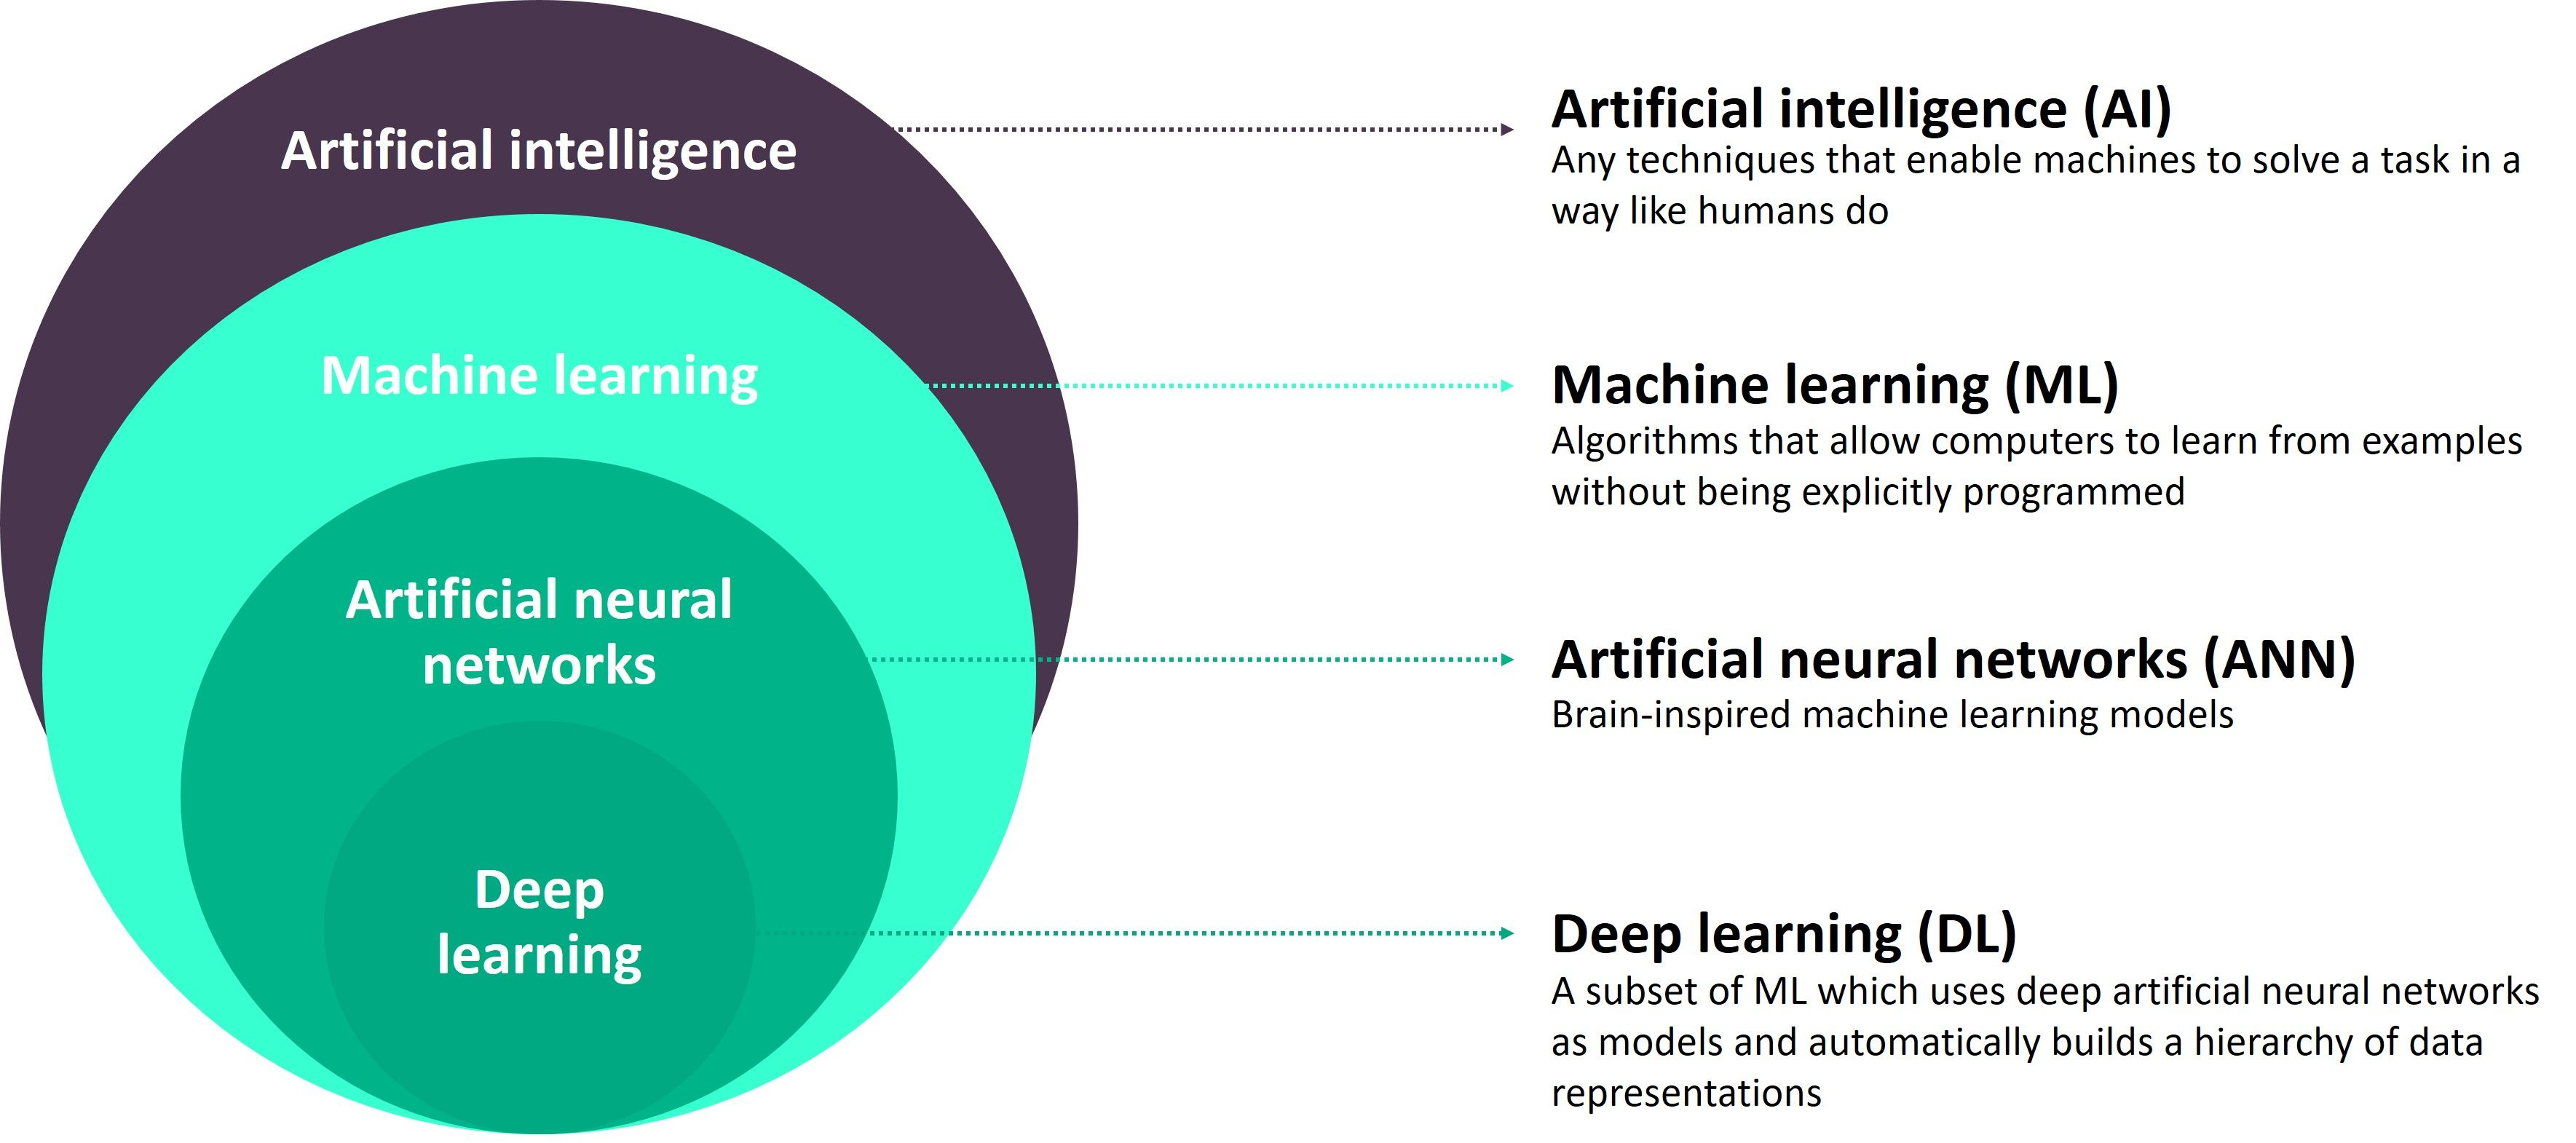

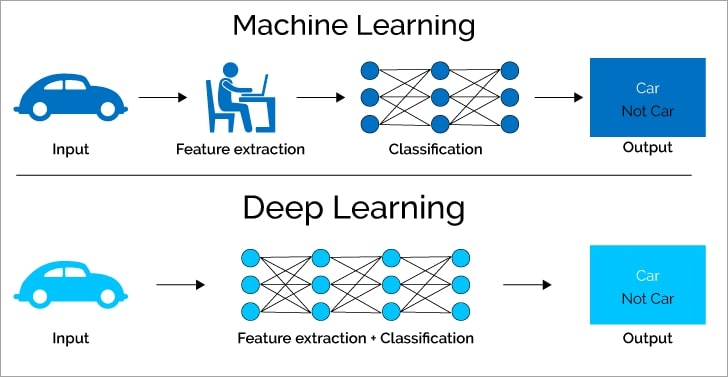

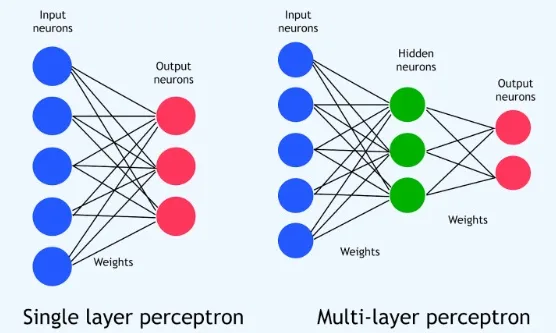

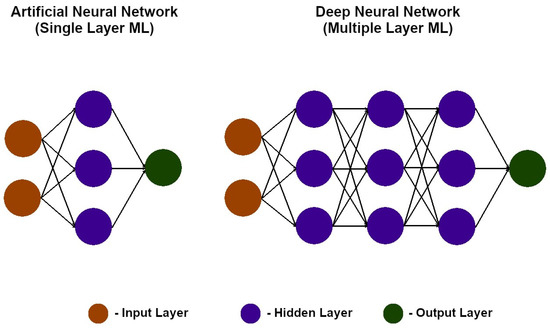

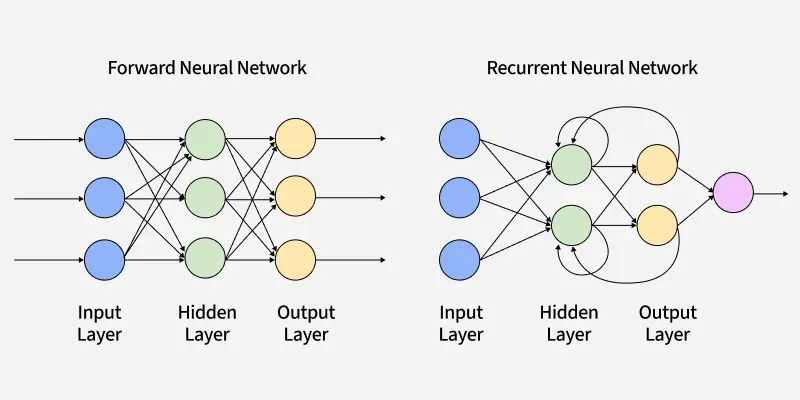

### Mapping OOP concepts to Neural Networks

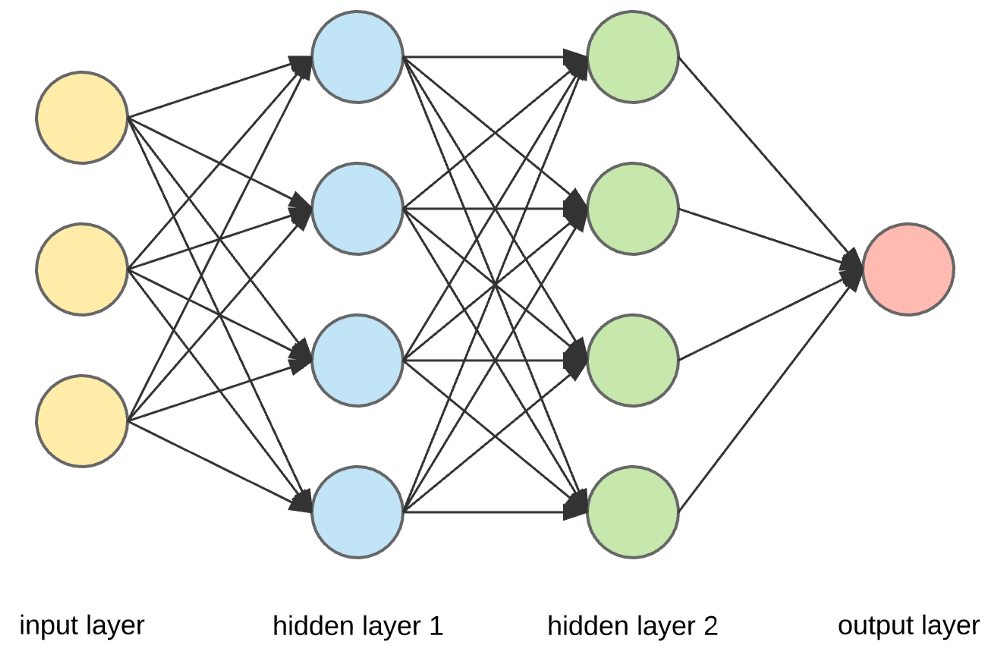

When we make a neural network in PyTorch, the network itself is a class, built on the back of the class, `nn.Module`.

Each layer inside the network is usually an object of a layer class (`nn.Linear`, `nn.Conv2d`, `nn.ReLU()`).

Parameters of each layer are attributes (things like `slope` and `y-int` could be these parameters)

The way we progress through the layers one at a time are methods (`forward`)